<a href="https://colab.research.google.com/github/mennatulah176/Machine-learning-model/blob/main/adult_income_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load the dataset (replace the path with your actual file path)
df = pd.read_csv('/content/adult income.csv')

In [ ]:
# Display column names
print("Column Names:")
print(df.columns.tolist())
# Display number of rows and columns
print("\nShape of Dataset (Rows, Columns):")
print(df.shape)
# Display first 10 rows
print("\nFirst 10 Rows:")
print(df.head(10))
# Display last 10 rows
print("\nLast 10 Rows:")
print(df.tail(10))

Column Names:
['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

Shape of Dataset (Rows, Columns):
(32561, 15)

First 10 Rows:
   age    workclass  fnlwgt     education  education.num marital.status  \
0   90            ?   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66            ?  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad     

In [ ]:
import pandas as pd

# Replace '?' with pd.NA and drop rows with missing values
df = df.replace('?', pd.NA).dropna()

# Strip and map income to binary
df['income'] = df['income'].astype(str).str.strip()
df = df[df['income'].isin(['<=50K', '>50K'])]  # keep only valid rows
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Show stats separately to avoid NaNs
print("\n🔹 Numeric Column Statistics:")
print(df.select_dtypes(include='number').describe())

print("\n🔹 Categorical Column Statistics:")
print(df.select_dtypes(include='object').describe())

print("\n🔹 Missing Values in Each Column:")
print(df.isnull().sum())

print("\n🔹 Income Class Distribution:")
print(df['income'].value_counts())

print("\n🔹 Income Percentage Distribution:")
print(df['income'].value_counts(normalize=True).rename("proportion") * 100)



🔹 Numeric Column Statistics:
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week        income  
count    30162.000000  30162.000000  
mean        40.931238      0.248922  
std         11.979984      0.432396  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000

data cleaning :

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN


#  Separate features and target
X = df.drop('income', axis=1)
y = df['income']  # Should already be numeric (0/1)

#  Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['number']).columns

#  One-hot encode categorical columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

#  Standardize numerical columns (only if they exist)
scaler = StandardScaler()
if len(num_cols) > 0:
    X[num_cols] = scaler.fit_transform(X[num_cols])
else:
    print(" No numerical columns found for scaling.")

#  Apply SMOTEENN to handle class imbalance
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X, y)



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (regression: no stratification needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                    # Use the original feature matrix and target vector
    test_size=0.2,           # Allocate 20% of the data for testing
    random_state=42          # Set random seed for reproducibility
)

# Print the shapes of the resulting training and testing sets
print('🔹 Training set:', X_train.shape, y_train.shape)  # Shape of features and target in training set
print('🔹 Testing set :', X_test.shape, y_test.shape)    # Shape of features and target in testing set


🔹 Training set: (24129, 96) (24129,)
🔹 Testing set : (6033, 96) (6033,)


In [ ]:
from xgboost import XGBClassifier

# Create and train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6,
                          random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

using xgboost :

In [ ]:
# Predict on test data
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

Using the following metrics:

Accuracy

Precision

Recall

F1-score

AUC-ROC

Explaining which metrics are most important for imbalanced datasets like this :

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4533
           1       0.78      0.63      0.70      1500

    accuracy                           0.86      6033
   macro avg       0.83      0.79      0.81      6033
weighted avg       0.86      0.86      0.86      6033

🔹 Confusion Matrix:

[[4262  271]
 [ 548  952]]

🔹 AUC-ROC Score: 0.9102


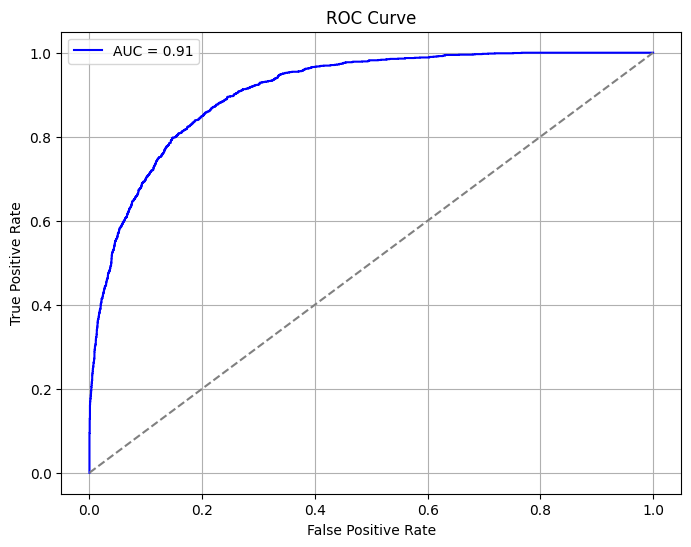

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Classification report
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred))
# Confusion matrix
print("🔹 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
# AUC-ROC score
y_proba = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"\n🔹 AUC-ROC Score: {auc:.4f}")
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔹 Best Parameters:
{'subsample': 0.8, 'reg_lambda': 2.0, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4533
           1       0.77      0.65      0.70      1500

    accuracy                           0.86      6033
   macro avg       0.83      0.79      0.81      6033
weighted avg       0.86      0.86      0.86      6033

🔹 Confusion Matrix:
[[4243  290]
 [ 532  968]]
🔹 Accuracy: 0.8637
🔹 AUC-ROC Score: 0.9234


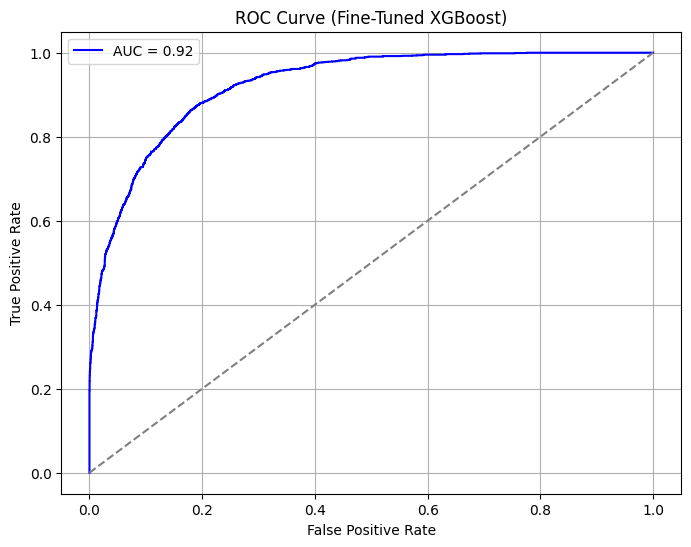

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Define hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_lambda': [1, 1.5, 2.0],
    'reg_alpha': [0, 0.1, 0.5]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best model from search
xgb_model = random_search.best_estimator_

# Predict
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("🔹 Best Parameters:")
print(random_search.best_params_)

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 AUC-ROC Score: {auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Fine-Tuned XGBoost)")
plt.legend()
plt.grid(True)
plt.show()


code for check if there is overfitting by graph :

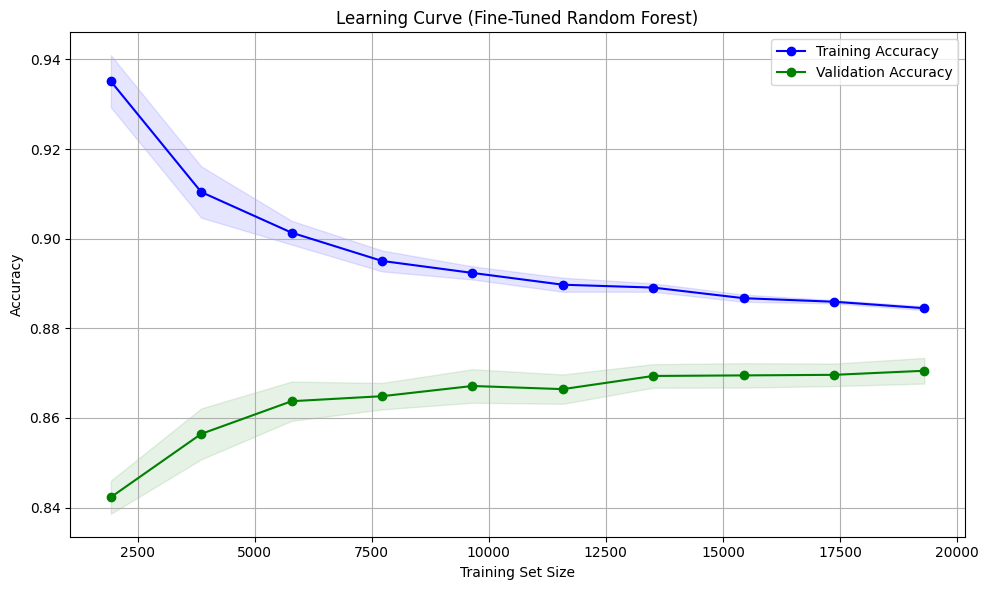

In [ ]:
from sklearn.model_selection import learning_curve
# Use the best model obtained from RandomizedSearchCV
model = xgb_model
# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42,
    n_jobs=-1
)
# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.title('Learning Curve (Fine-Tuned Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

code for check if there is overfitting by numbers :

🔹 Training Accuracy: 0.8951
🔹 Training AUC-ROC Score: 0.9615

🔹 Testing Accuracy: 0.8546
🔹 Testing AUC-ROC Score: 0.9102

🔹 Conclusion:
✅ No overfitting detected.


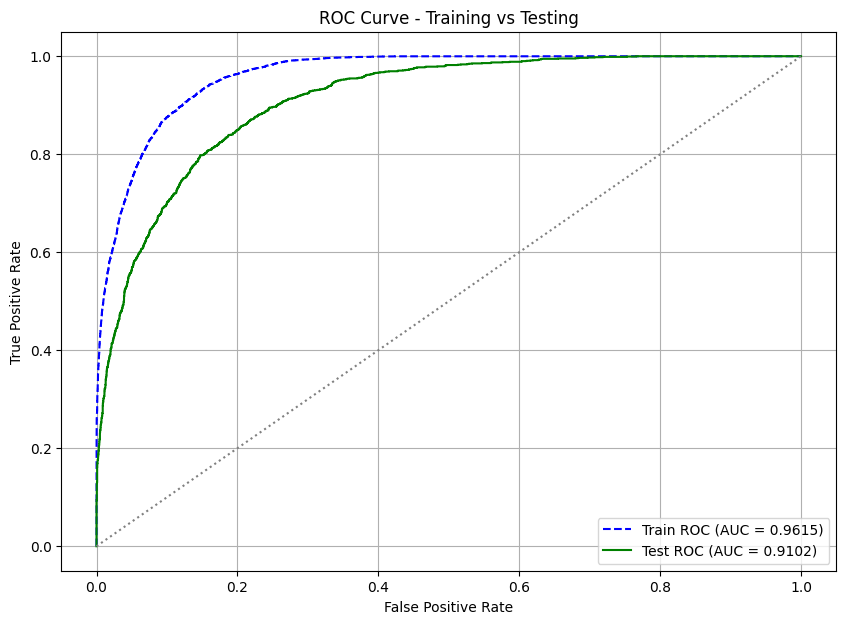

In [ ]:
# 1. Predictions on Training Set (for overfitting check)
# Predict on training data
y_pred_train = rf_model.predict(X_train)
y_proba_train = rf_model.predict_proba(X_train)[:, 1]
# Evaluate on training data
train_accuracy = accuracy_score(y_train, y_pred_train)
train_auc = roc_auc_score(y_train, y_proba_train)
print("🔹 Training Accuracy:", f"{train_accuracy:.4f}")
print("🔹 Training AUC-ROC Score:", f"{train_auc:.4f}")
# 2. Predictions on Test Set (for overfitting checking)
# Predict on test data
y_pred_test = rf_model.predict(X_test)
y_proba_test = rf_model.predict_proba(X_test)[:, 1]
# Evaluate on test data
test_accuracy = accuracy_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_proba_test)
print("\n🔹 Testing Accuracy:", f"{test_accuracy:.4f}")
print("🔹 Testing AUC-ROC Score:", f"{test_auc:.4f}")
# 3. Overfitting Detection Conclusion
print("\n🔹 Conclusion:")
if (train_accuracy - test_accuracy) > 0.05:
    print("⚠️ Potential Overfitting: Training accuracy much higher than Testing accuracy.")
else:
    print("✅ No overfitting detected.")
# 4. ROC Curve Plot
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(10, 7))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {train_auc:.4f})', color='blue', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_auc:.4f})', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')
plt.title('ROC Curve - Training vs Testing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

So From The Previous We Found That The Accuracy Reaches To 86% Without Any Overfitting